# Charming Reaction Assignment 

Webscrape fra https://www.dba.dk/biler/biler/

In [11]:
#Libraries used in class assignments

import bs4
from bs4 import BeautifulSoup
from tqdm import tqdm
from selenium import webdriver
import matplotlib.pyplot as plot
import json
from selenium.webdriver.support.ui import WebDriverWait


In [12]:
base_url = 'https://www.dba.dk/biler/biler/'

browser = webdriver.Firefox()

def get_bsoup(url):

    browser.get(url)
    
    browser.implicitly_wait(3)

    return BeautifulSoup(browser.page_source, 'html.parser') 

1. Hvor mange brugte biler er der at vælge i mellem"

In [13]:
def amount_of_cars(url):
    annonce_type_div = get_bsoup(url).findAll( "div", {"class": "navigator radioNavigator modulePanel"})
    small_tags = annonce_type_div[0].findAll("small")
    amount_cars = small_tags[0].text
    print('Amount of Cars on DBA for Sale: ', amount_cars)

amount_of_cars(base_url)

Amount of Cars on DBA for Sale:  (32909)


2. Udskriv alle biler af mærket Ford"

In [14]:

def print_fords(url):
    url = url + '/maerke-ford'
    bsoup_of_page = get_bsoup(url)
    page = '/side-'
    
    cars_a_tag = bsoup_of_page.findAll("a", {"class": "trackClicks", "data-ga-act": "click", 
                                             "data-ga-lbl": "paging-number",
                                             },)
    
    number_of_pages = int("".join(filter(str.isdigit, cars_a_tag[-1].text)))
    
    for page_number in tqdm(range(1, number_of_pages + 1)):
        bsoup = get_bsoup(url + page + str(page_number))
        cars = bsoup.findAll("tr", {"class": "dbaListing listing"})
        
        for car in cars:
            car_tag = car.findAll("a", {"class": "listingLink"})
            print(car_tag[1].text.encode('utf-8'))
            print('\n')
            
print_fords(base_url)



100%|██████████| 100/100 [03:12<00:00,  1.92s/it]


b'Ford Focus 1,6 TDCi 115 Business stc. Diesel model\xc3\xa5r 2015 km 167000 Sortmetal tr\xc3\xa6k nysynet klimaanl\xc3\xa6g ABS airbag startsp\xc3\xa6rre servostyring, fuldaut. klima, fjernb. c.l\xc3\xa5s, fartpilot, k\xc3\xb8recomputer, infocenter, startsp\xc3\xa6rre, h\xc3\xb8jdejust. f\xc3\xb8rers\xc3\xa6de, 4x el-ruder, stofindtr\xc3\xa6k, kopholder, isofix, usb tilslutning, bluetooth, navigation, cd/radio, 6 GEAR ,, 8 airbags, automatisk lys, arml\xc3\xa6n, tidligere undervognsbehandlet, tr\xc3\xa6k, ikke ryger, udv. temp. m\xc3\xa5ler, regnsensor, s\xc3\xa6devarme, multifunktionsrat...'


b'Ford C-MAX 2,0 TDCi 115 Titanium aut. Diesel aut. Automatgear model\xc3\xa5r 2012 km 215000 Sortmetal ABS airbag service ok partial, Tr\xc3\xa6k, ABS, Klimaanl\xc3\xa6g, Automatgear, Fartpilot, Elektriske sideruder, Varme i s\xc3\xa6der, N\xc3\xb8glefri betjening, Parkeringssensor, Auto. n\xc3\xb8dbremse. P\xc3\xa6n og velholdt bil med fuld l\xc3\xa6derkabine, 2 zone klima, fjernb. c.l\xc3\xa

3. Åben de 5 dyreste biler med selenium i decending order og vis dem med et bar chart"

100%|██████████| 5/5 [00:00<00:00, 5014.71it/s]


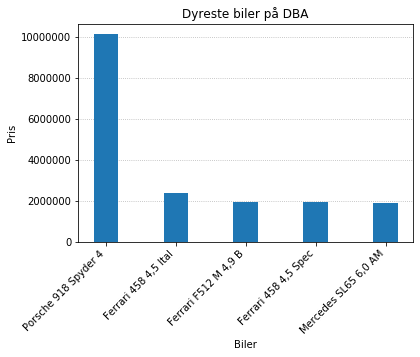

In [15]:
def the_5_most_expensive(url):
    browser.get(url)
    gdrp_button = browser.find_element_by_id('gdpr-notice__accept')
    gdrp_button.click()

    def sort_By_Price():
        tablehead = browser.find_element_by_class_name('sorting')
        span = tablehead.find_elements_by_class_name('human-ref')[-1]
        span.click()
        browser.implicitly_wait(3)
    
    # Use sort twice, to ensure the most expensive cars is first
   
    sort_By_Price()
    sort_By_Price()
 
    soup = BeautifulSoup(browser.page_source, 'html.parser')
    data = soup.findAll('tr', {'class': 'dbaListing listing'})
    cars = []
    
    for item in data[:5]:
        car = item.find('script', {'type': 'application/ld+json'})
        jsoncar = json.loads(car.text)
        cars.append({'name': jsoncar['name'],
                     'price': jsoncar['offers']['price']})
    return cars

def plot_top_cost_cars(data):
    fig, ax = plot.subplots()
    ax.ticklabel_format(style='plain')
    plot.grid(axis='y', linestyle='dotted', zorder=0)
    names = []
    prices = []
    
    for car in tqdm(data):
        names.append(car['name'][:20])
        prices.append(car['price'])
        
    car_data = dict(zip(names, prices))
    plot.bar(car_data.keys(), list(map(int, car_data.values())), zorder=3, width=0.35, align='center', bottom=0)
    plot.title('Dyreste biler på DBA')
    plot.xlabel('Biler')
    plot.ylabel('Pris')
    plot.xticks(rotation=45, ha="right")
    plot.show()
    
plot_top_cost_cars(the_5_most_expensive(base_url))

browser.close()
